# Audio Features for Single Chord Progression

This figure compares one of the highest-valence (happiest) chord progressions to all other chord progressions.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# load data

has_audio_data_pruned = pd.read_csv('three_four_five_has_audio_pruned.csv')

cp_group_sizes = has_audio_data_pruned.groupby('cp').size()
cp_group_sizes.name='n'
cp_group_sizes = cp_group_sizes.reset_index()


has_audio_data_pruned = has_audio_data_pruned.merge(cp_group_sizes, on='cp')

# We only look at chord progressions associated to at least five artist/song/section combinations
has_5_obs = has_audio_data_pruned[has_audio_data_pruned.n>=5]

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


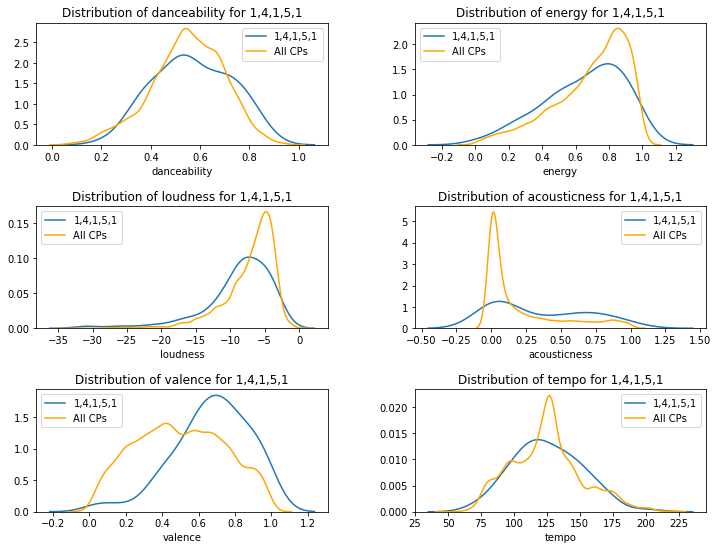

In [3]:
numeric_audio_features = ['danceability', 'energy', 'loudness', 
                           'acousticness', 'valence', 'tempo']


def cp_plot(cp, data, numeric_features=[], compare=False):
    cp_data = data[data.cp==cp]
    num_plots = len(numeric_features)
    cols = int(np.ceil(num_plots/3))
    fig = plt.figure(figsize=(6*cols,9))
    fig.subplots_adjust(hspace=.5, wspace=.3)
    for i, feature in enumerate(numeric_features):
        ax = fig.add_subplot(3, cols, i+1)
        sns.distplot(cp_data[feature], hist=False, ax=ax, label=cp)
        if compare:
            sns.distplot(data[feature], color='orange', hist=False, ax=ax,
                         label='All CPs')
        ax.set_title('Distribution of {} for {}'.format(feature, cp))
    plt.show()
    
cp_plot('1,4,1,5,1',has_5_obs, numeric_features=numeric_audio_features, compare=True)